In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

#  Data Loading

In [2]:
data = pd.read_csv("dataset_med.csv")

In [3]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05-04-2016,Stage I,Yes,Passive Smoker,29.4,221,0,0,1,0,Chemotherapy,10-09-2017,0
1,2,50,Female,Netherlands,20-04-2023,Stage III,Yes,Passive Smoker,41.2,136,1,1,0,0,Surgery,17-06-2024,1
2,3,65,Female,Hungary,05-04-2023,Stage III,Yes,Former Smoker,44.0,259,1,1,0,0,Combined,09-04-2024,0
3,4,51,Female,Belgium,05-02-2016,Stage I,No,Passive Smoker,43.0,213,1,1,0,0,Chemotherapy,23-04-2017,0
4,5,37,Male,Luxembourg,29-11-2023,Stage I,No,Passive Smoker,19.7,195,0,0,0,0,Combined,08-01-2025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,01-07-2022,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,23-02-2023,0
889996,889997,62,Female,Cyprus,27-09-2015,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,19-06-2017,0
889997,889998,48,Female,Estonia,27-03-2016,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,23-01-2017,1
889998,889999,67,Female,Slovakia,22-12-2015,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,12-12-2017,0


In [4]:
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05-04-2016,Stage I,Yes,Passive Smoker,29.4,221,0,0,1,0,Chemotherapy,10-09-2017,0
1,2,50,Female,Netherlands,20-04-2023,Stage III,Yes,Passive Smoker,41.2,136,1,1,0,0,Surgery,17-06-2024,1
2,3,65,Female,Hungary,05-04-2023,Stage III,Yes,Former Smoker,44.0,259,1,1,0,0,Combined,09-04-2024,0
3,4,51,Female,Belgium,05-02-2016,Stage I,No,Passive Smoker,43.0,213,1,1,0,0,Chemotherapy,23-04-2017,0
4,5,37,Male,Luxembourg,29-11-2023,Stage I,No,Passive Smoker,19.7,195,0,0,0,0,Combined,08-01-2025,0


#  Exploring Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [6]:
data.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633747,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432399,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
print(numerical_columns)

Index(['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived'],
      dtype='object')


In [8]:
print(data.columns)

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')


#  Data Cleaning

In [9]:
data.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.skew(numeric_only = True)

id                   2.331668e-15
age                 -3.361073e-04
bmi                 -5.325786e-05
cholesterol_level   -2.962397e-01
hypertension        -1.154848e+00
asthma               1.212607e-01
cirrhosis            1.310557e+00
other_cancer         2.905180e+00
survived             1.350244e+00
dtype: float64

In [12]:

data['cholesterol_level'] = np.log(data['cholesterol_level'])

# Data Visualization

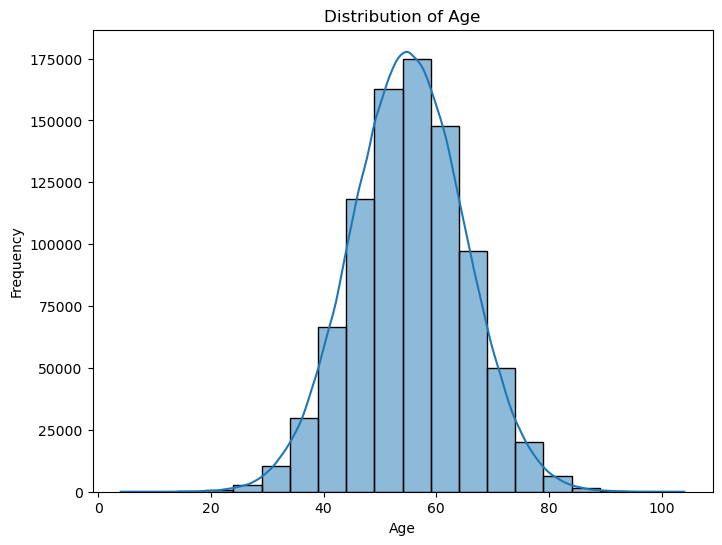

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data['age'],bins=20,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

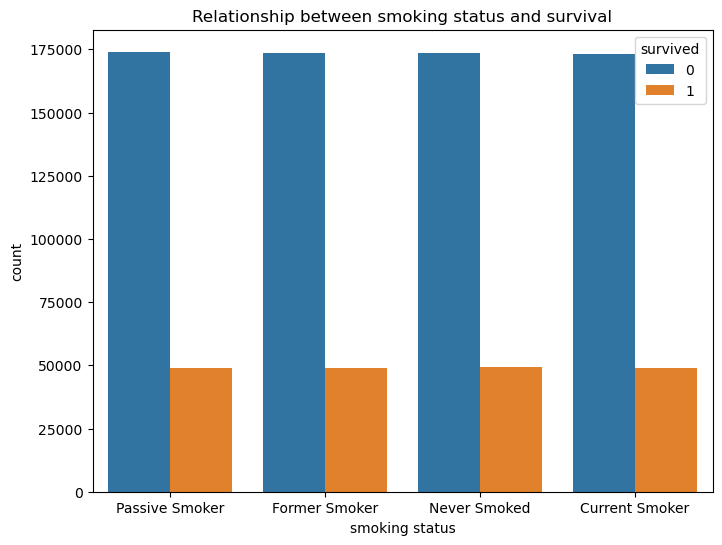

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoking_status',hue='survived',data=data)
plt.title('Relationship between smoking status and survival')
plt.xlabel('smoking status')
plt.ylabel('count')
plt.show()

# Countplot

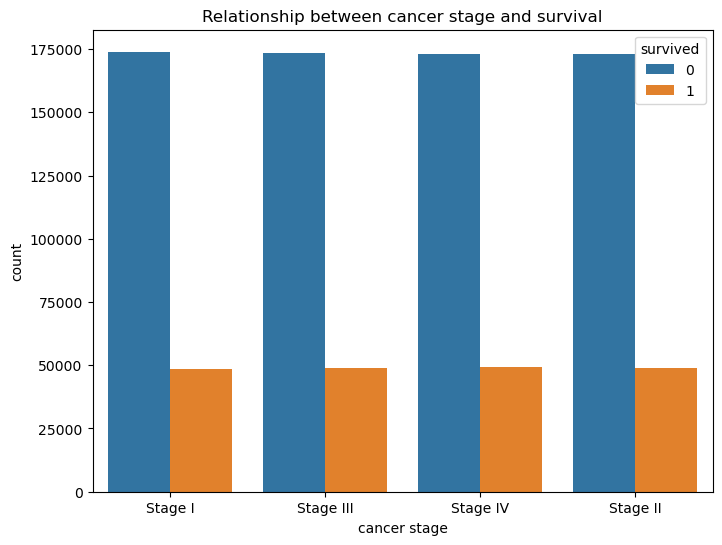

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='cancer_stage',hue='survived',data=data)
plt.title('Relationship between cancer stage and survival')
plt.xlabel('cancer stage')
plt.ylabel('count')
plt.show()

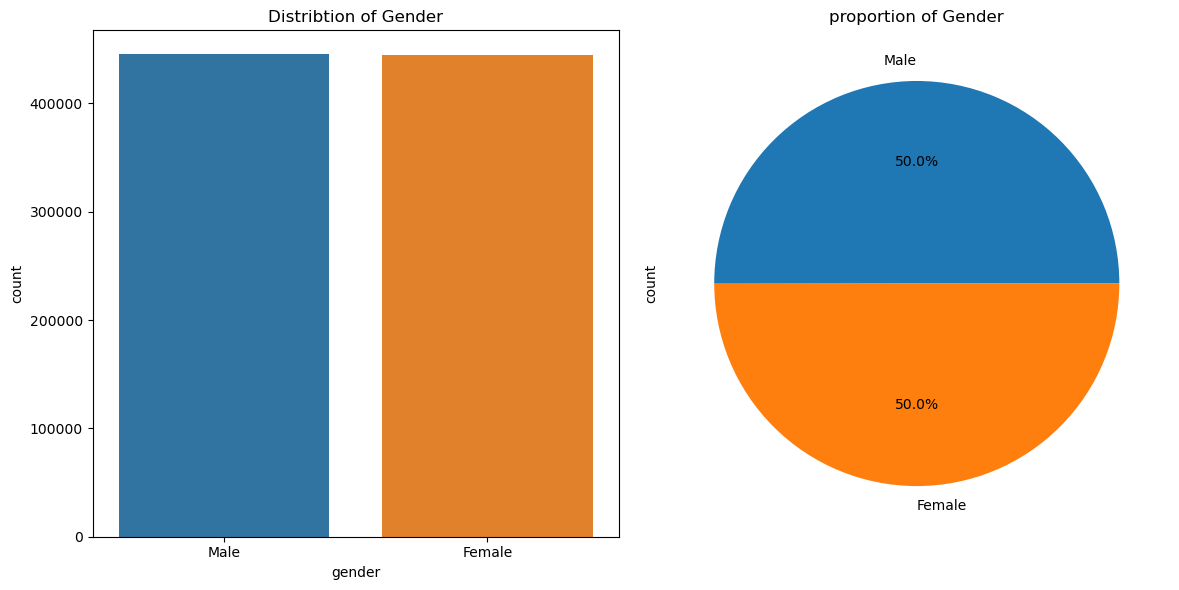

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#create figure with subplot
fig, axs = plt.subplots(1,2, figsize=(12,6))

#plot a countplot for gender
sns.countplot(x='gender', data=data, ax=axs[0])
axs[0].set_title('Distribtion of Gender')

#plot a pie chart for gender
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1])
axs[1].set_title('proportion of Gender')
                                    
#show the plot
plt.tight_layout()
plt.show()



# Correlation Heatmap

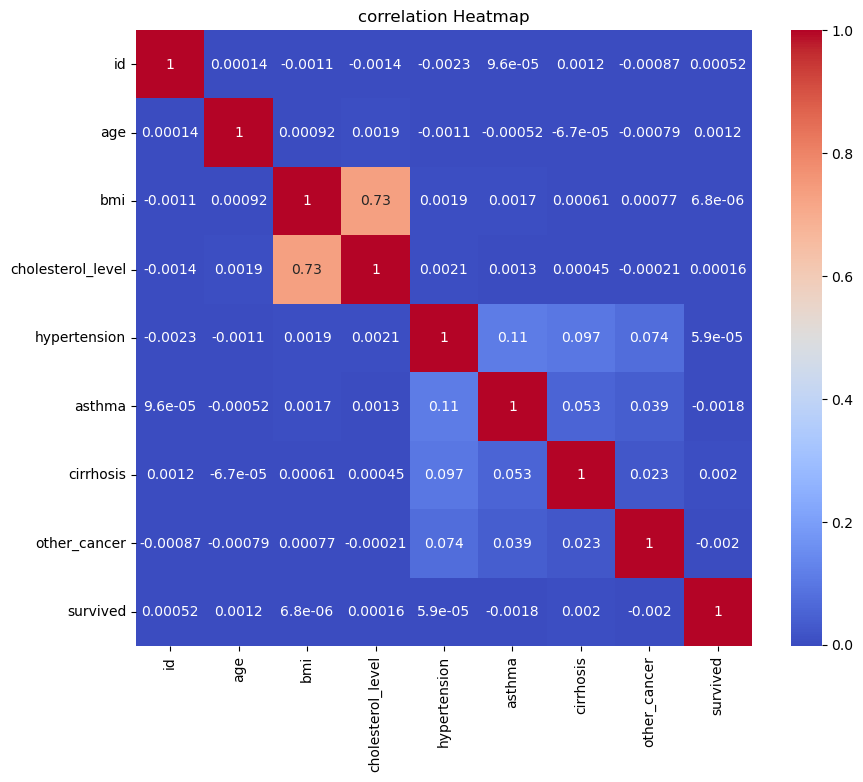

In [17]:
plt.figure(figsize=(10,8))
corr_matrix=data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('correlation Heatmap')
plt.show()

In [18]:
#Select only numeric columns
numeric_data = data.select_dtypes(include=['int64','float64'])


In [19]:
#Define features (x) and target (y)
x=numeric_data.drop('survived',axis=1)
y=numeric_data['survived']

In [20]:
#Split data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

# Random Forest Classifier

In [21]:
#Train a Random Forest Classifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
#Make prediction
y_pred=model.predict(x_test)

In [23]:
#Evaluate model performance
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7718595505617978
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87    138639
           1       0.23      0.01      0.02     39361

    accuracy                           0.77    178000
   macro avg       0.50      0.50      0.45    178000
weighted avg       0.66      0.77      0.68    178000

Confusion Matrix:
[[136880   1759]
 [ 38850    511]]


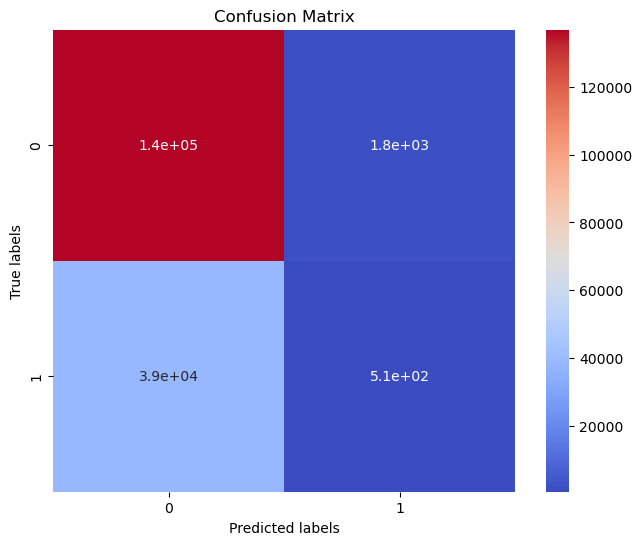

In [24]:
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Logistic Regression

In [25]:
#Train a Logistic Regression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [26]:
#Make prediction
y_pred=model.predict(x_test)

In [27]:
#Evaluate model performance
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7788707865168539
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000

Confusion Matrix:
[[138639      0]
 [ 39361      0]]


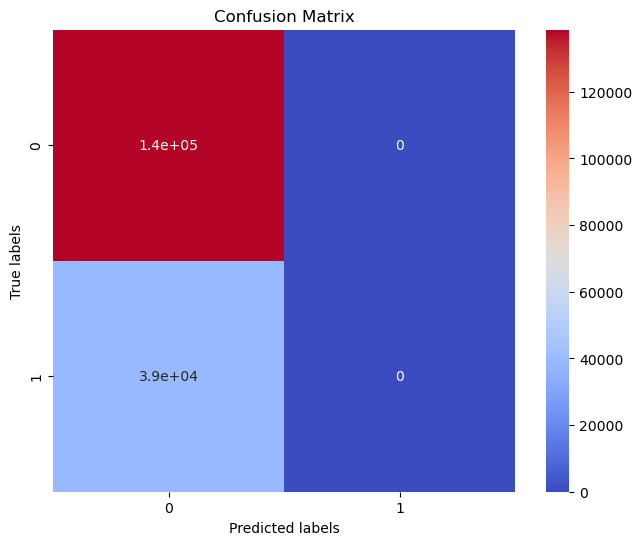

In [28]:
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#  GradientBoostingClassifier

In [29]:
#Train a Gradient Boosting Classifier
model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [30]:
#Make prediction
y_pred=model.predict(x_test)

In [31]:
#Evaluate model performance
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7788539325842697
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000

Confusion Matrix:
[[138636      3]
 [ 39361      0]]


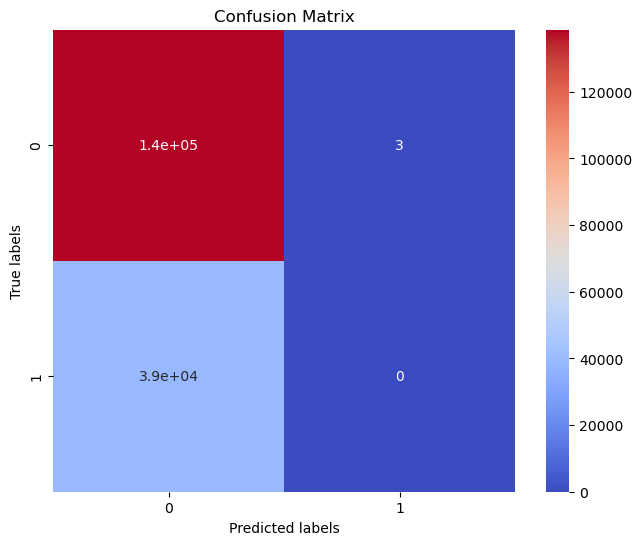

In [32]:
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()